In [1]:
import os

os.chdir(r'C:\Users\caroline.ohagan\Documents\INTERN_PROJECT_2024\DATA\CHLOROPHYLL')

In [2]:
os.chdir(r'C:\users\caroline.OHagan\Downloads')
%run ./startup_file.ipynb #run startup file and install libraries if necessary

# CHL_TIMESERIES

## Author: caroline OHagan

##### *Last run on 2024-07-26*

In [3]:
import wget

In [4]:
start_date = '20230101' #(yyyy-mm-dd format)
end_date = '20231231'
proj_data = '/CHLOROPHYLL' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
os.chdir(data_dir_fold)
fname = "/DD8_" + start_date + '_'+ end_date + ".nc" #create unique filename 
#follow kims naming structure 
#DD8_yyyymmdd_yyyymmdd start end dates #write function to get that parts of URL 
file = data_dir_fold+fname
dc_source = xr.open_dataset(file, decode_cf=True) #open nc file 
dc_source #inspect xarray dataset

proj_data = '/SEASCAPES' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
os.chdir(data_dir_fold)
fname = "/DD8_" + start_date + '_'+ end_date + ".nc" #create unique filename 
#follow kims naming structure 
#DD8_yyyymmdd_yyyymmdd start end dates #write function to get that parts of URL 
file = data_dir_fold+fname
seascapes = xr.open_dataset(file, decode_cf=True) #open nc file 

import xarray_regrid
dc_source = dc_source.regrid.linear(seascapes) #regrid data 

In [5]:
num_files = len(seascapes.CLASS.values)

In [6]:
# CREATE DICTIONARIES OF MASKS
masks = {}
mask_one = []

for y in range(1,34):
    mask_one = []
    for x in range(num_files):
        cn= np.ma.masked_where(seascapes.CLASS.values[x]==y, seascapes.CLASS.values[x])
        mask_one.append(cn)
        masks.update({y: mask_one})

In [7]:
from scipy import stats

In [8]:
# CREATE DICTIONARIES OF PERCENTS
avgs = []
averages = {}
se = []
std_err = {}
for y in range(1,34):
    avgs = []
    se = []
    for x in range(num_files):
        me = np.nanmean(dc_source.chlor_a.values[x][masks[y][x].mask])
        xx = stats.sem(dc_source.chlor_a.values[x][masks[y][x].mask][~np.isnan(dc_source.chlor_a.values[x][masks[y][x].mask])])
        se.append(xx)
        std_err.update({y:se})
        avgs.append(me)
        averages.update({y:avgs})

In [9]:
#this turns the datetimes into strings and splits them into yyyy-mm-dd for labeling the date axis 
#add this BEFORE plot
d8s = []
month = []

for x in range(len(seascapes.time.data)):
    d88 = str(seascapes.time.data[x])
    d88 = d88.split('T')
    d8s.append(d88[0])
    M = seascapes.time[x].dt.strftime('%B').item()
    month.append(M)

In [10]:
xi = list(range(len(seascapes.time)))

In [11]:
final_se = []
for x in range(1,34):
    se= stats.sem(averages[x])
    final_se.append(se)

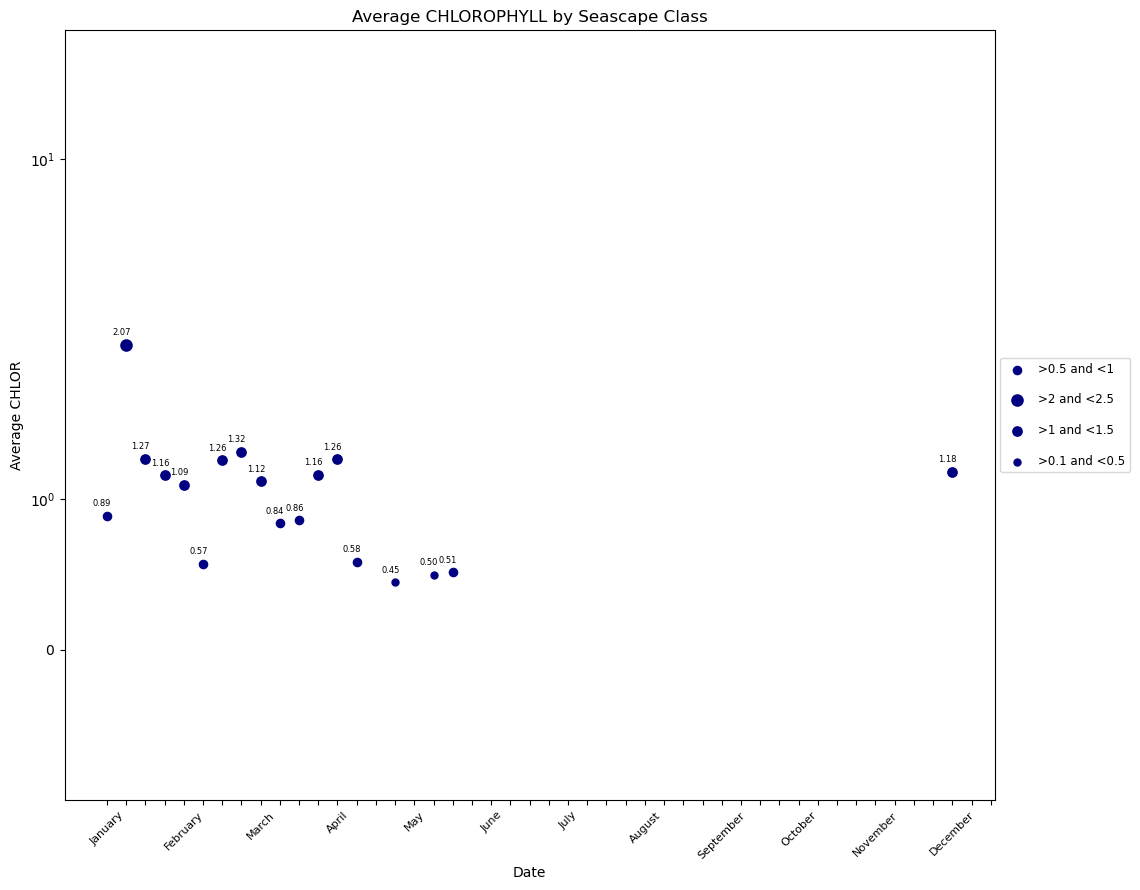

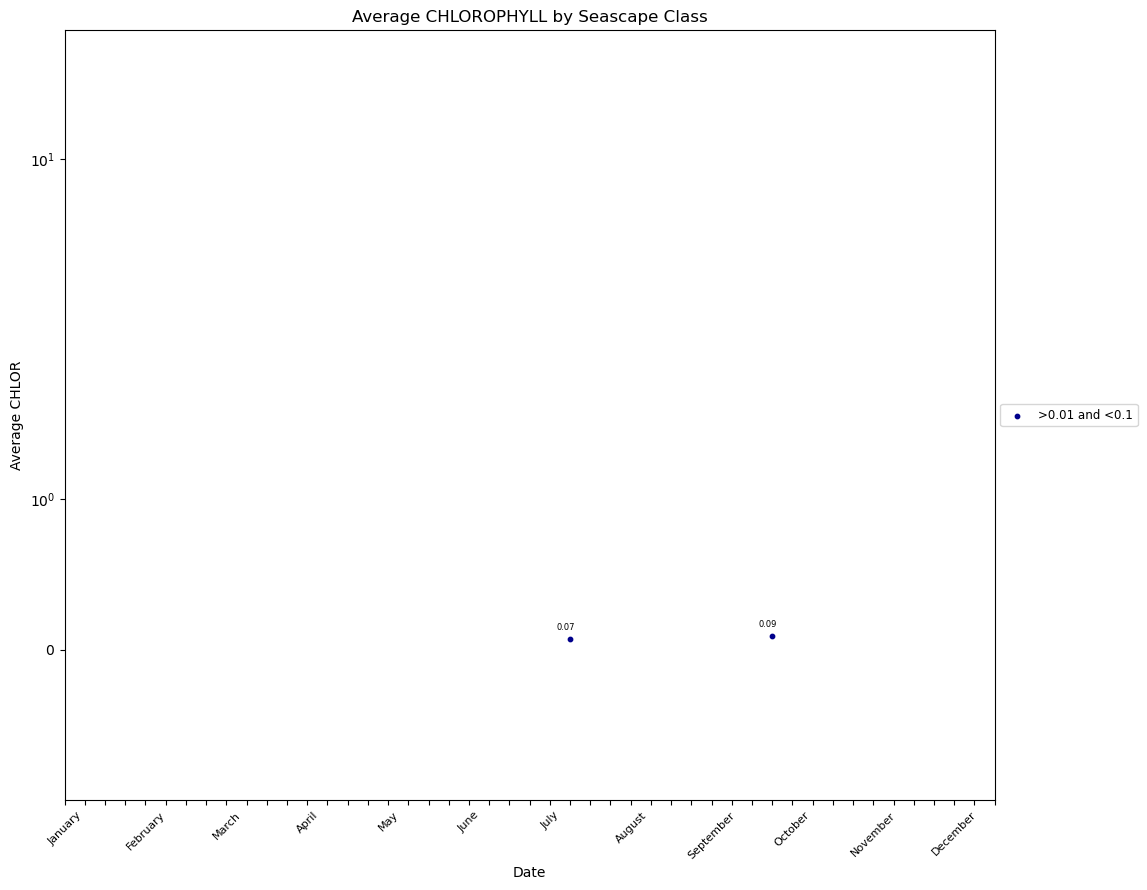

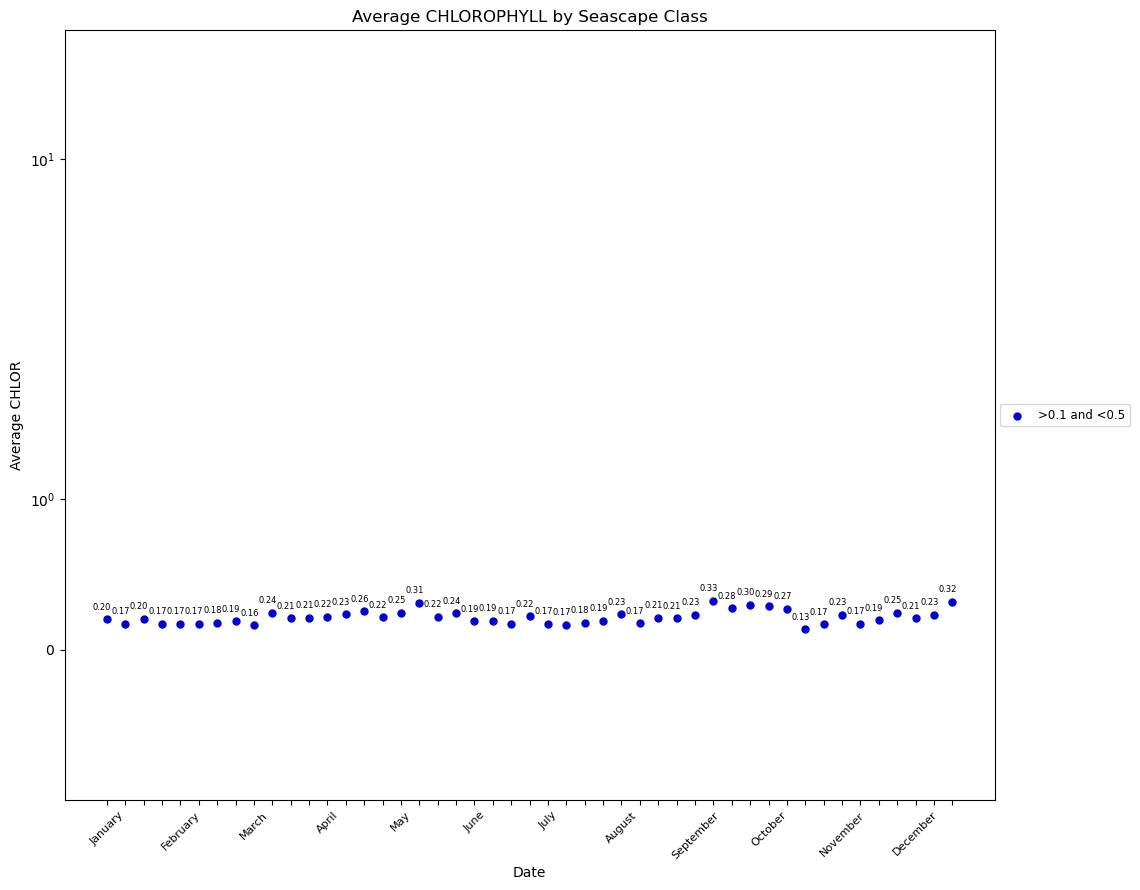

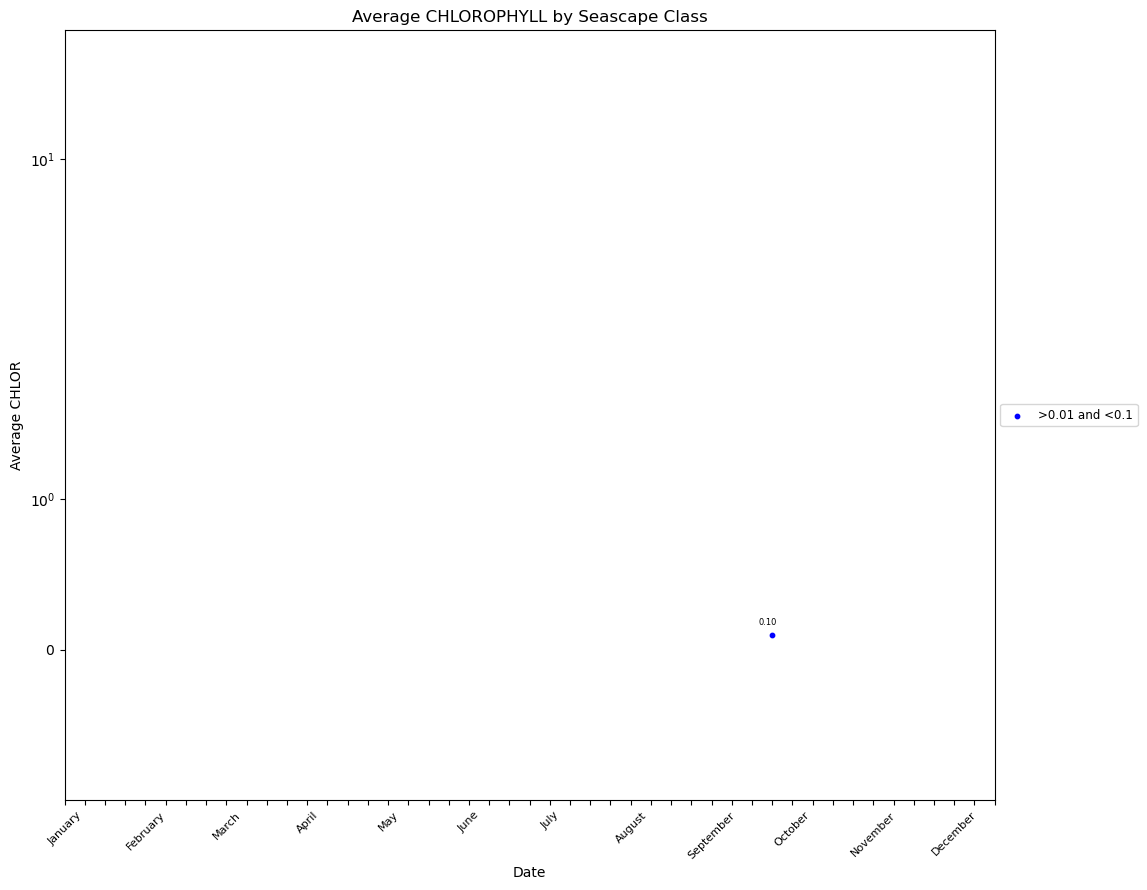

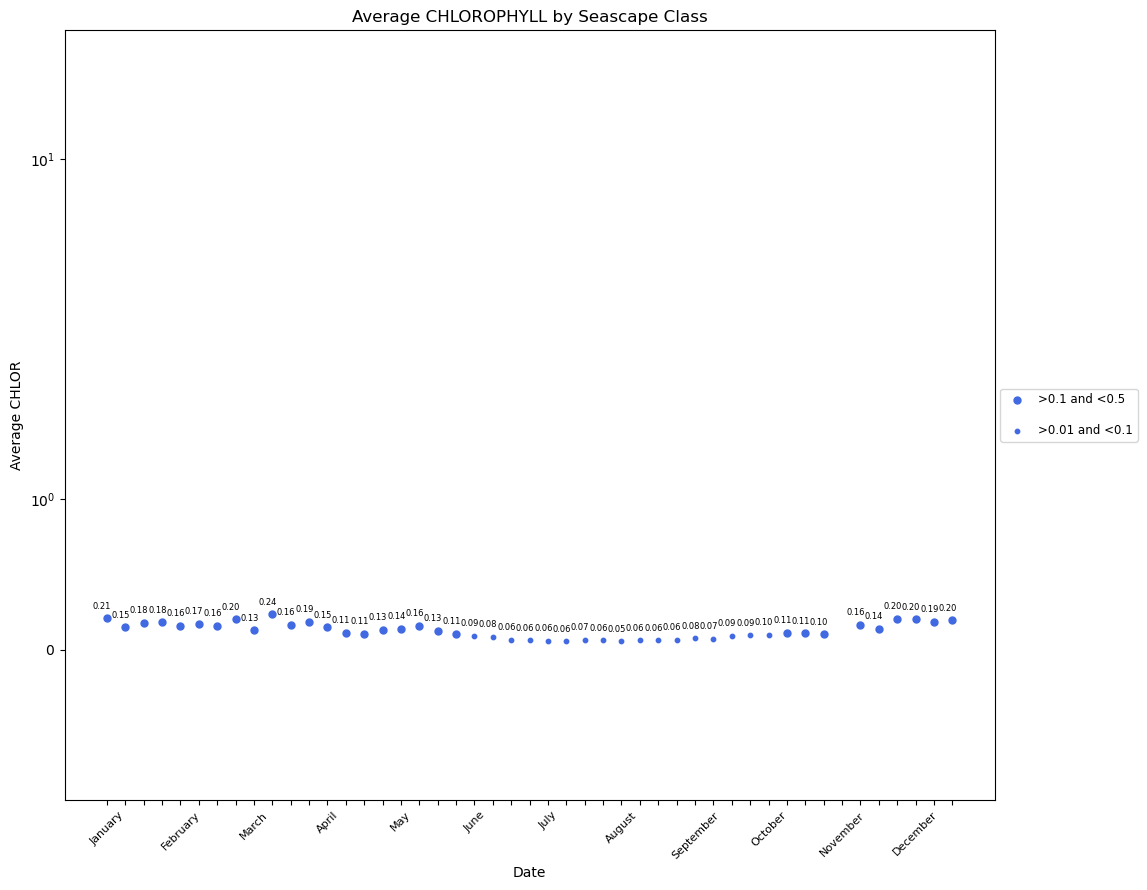

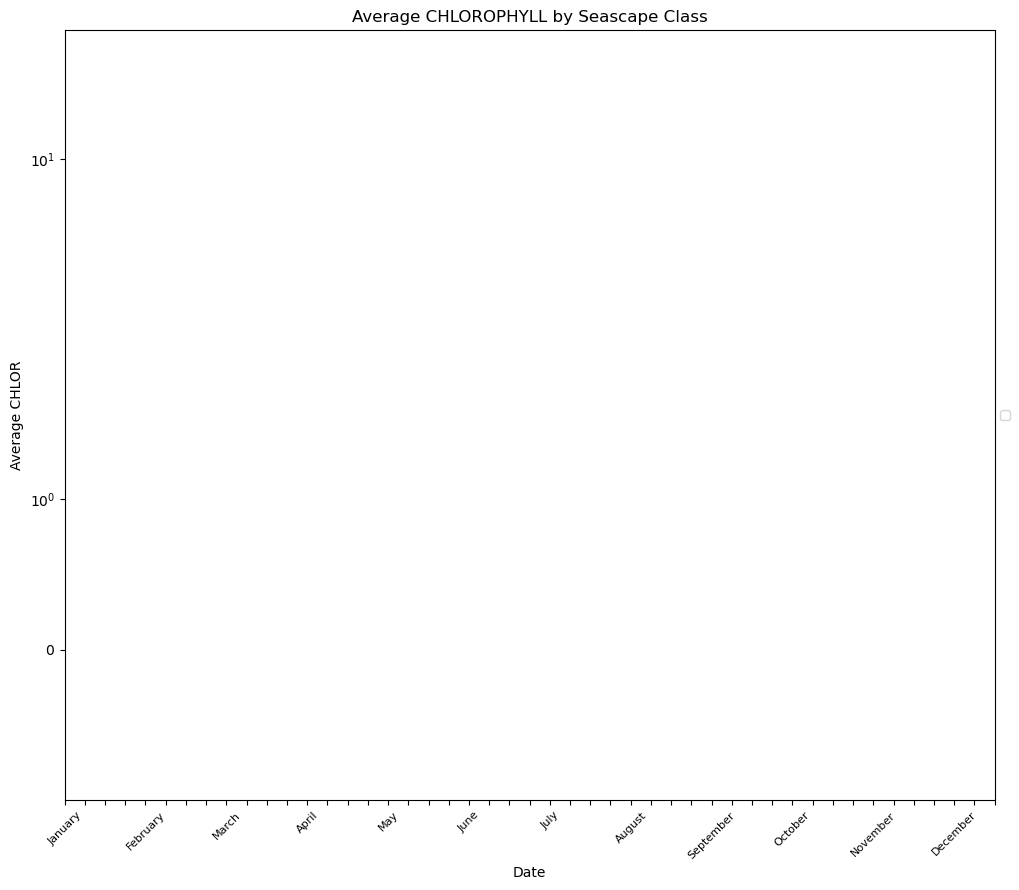

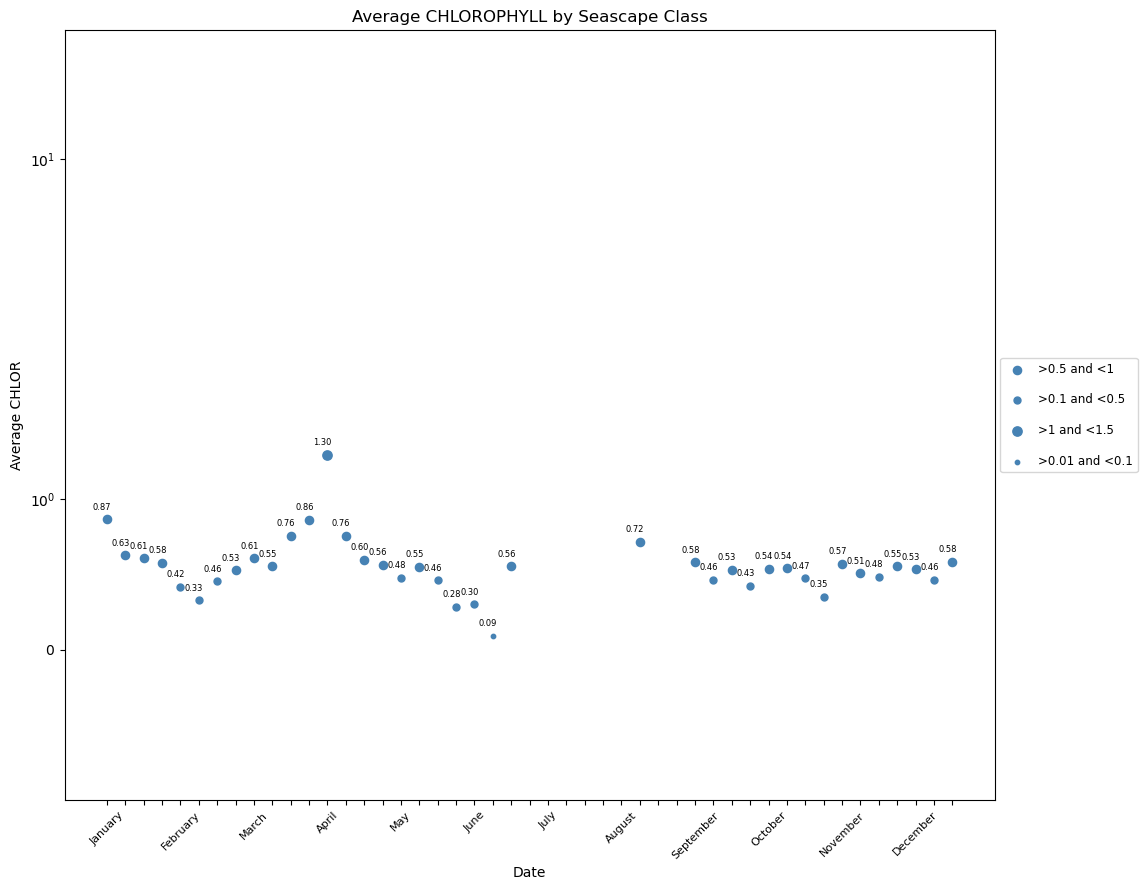

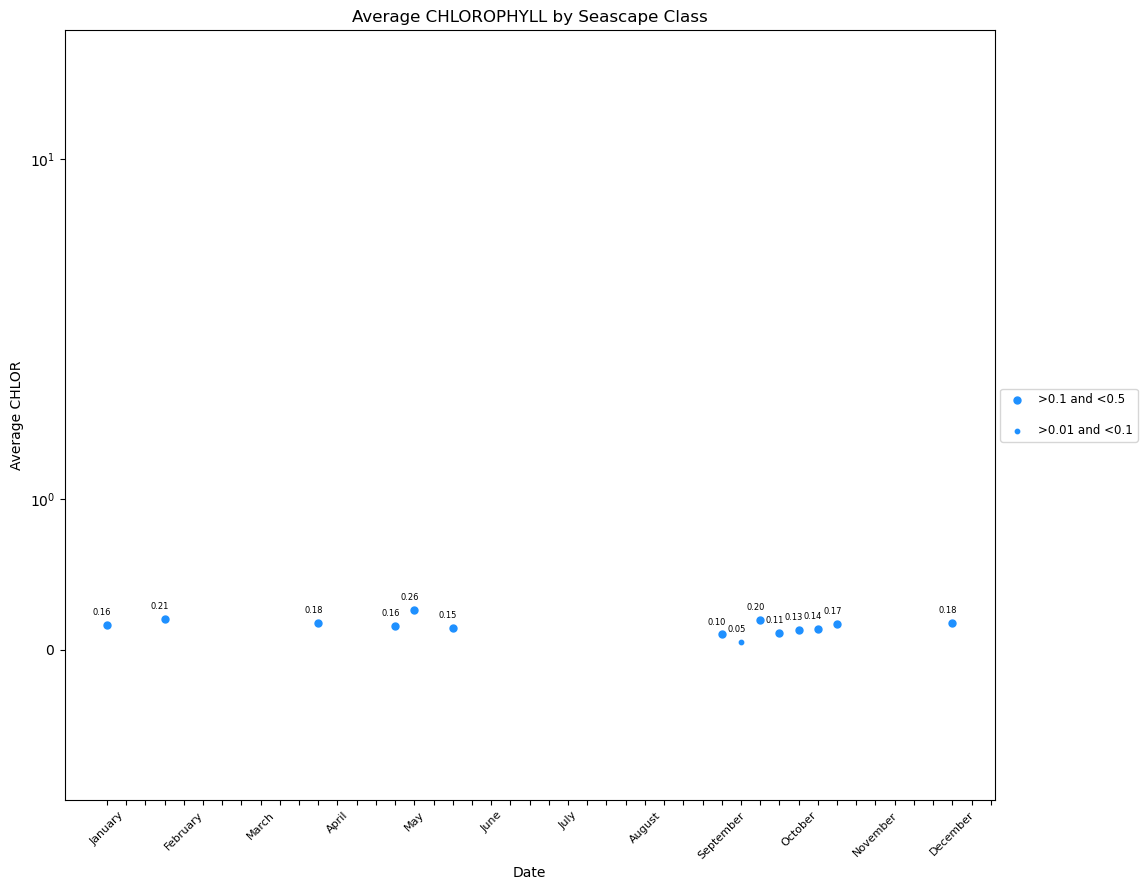

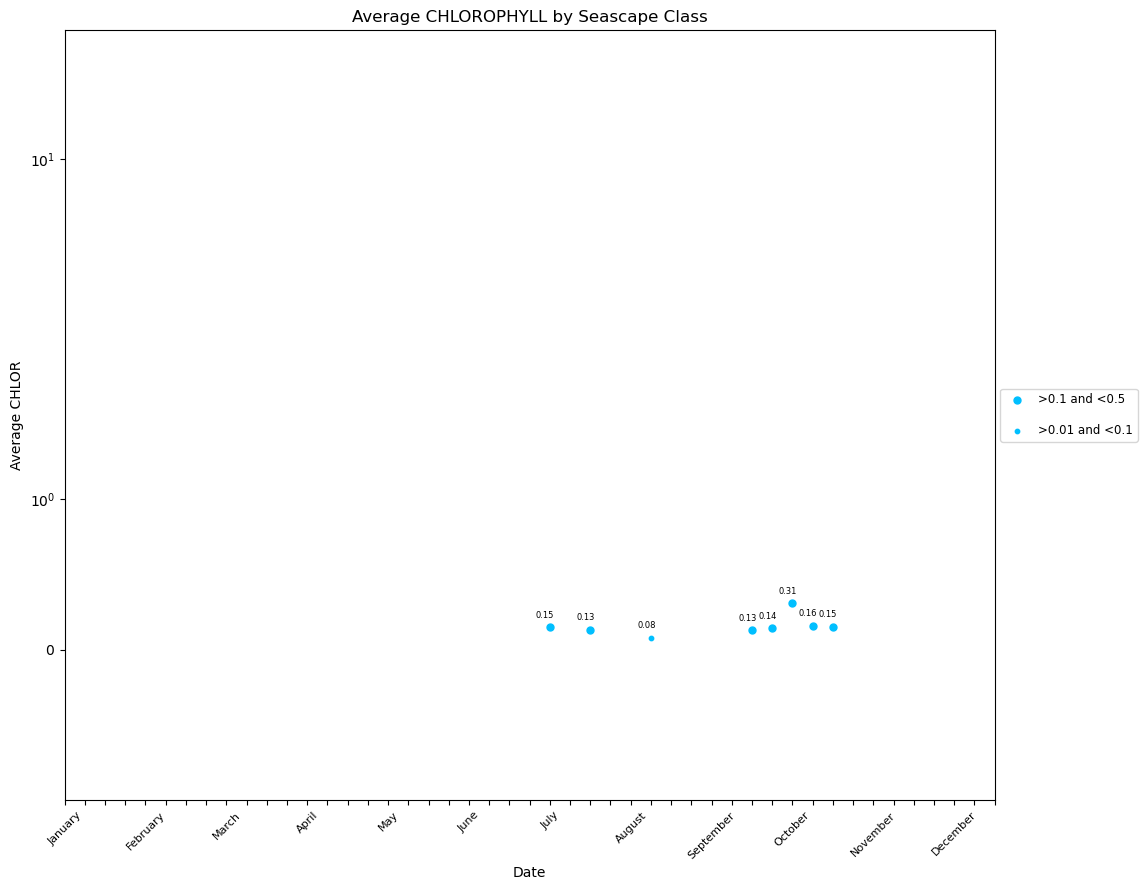

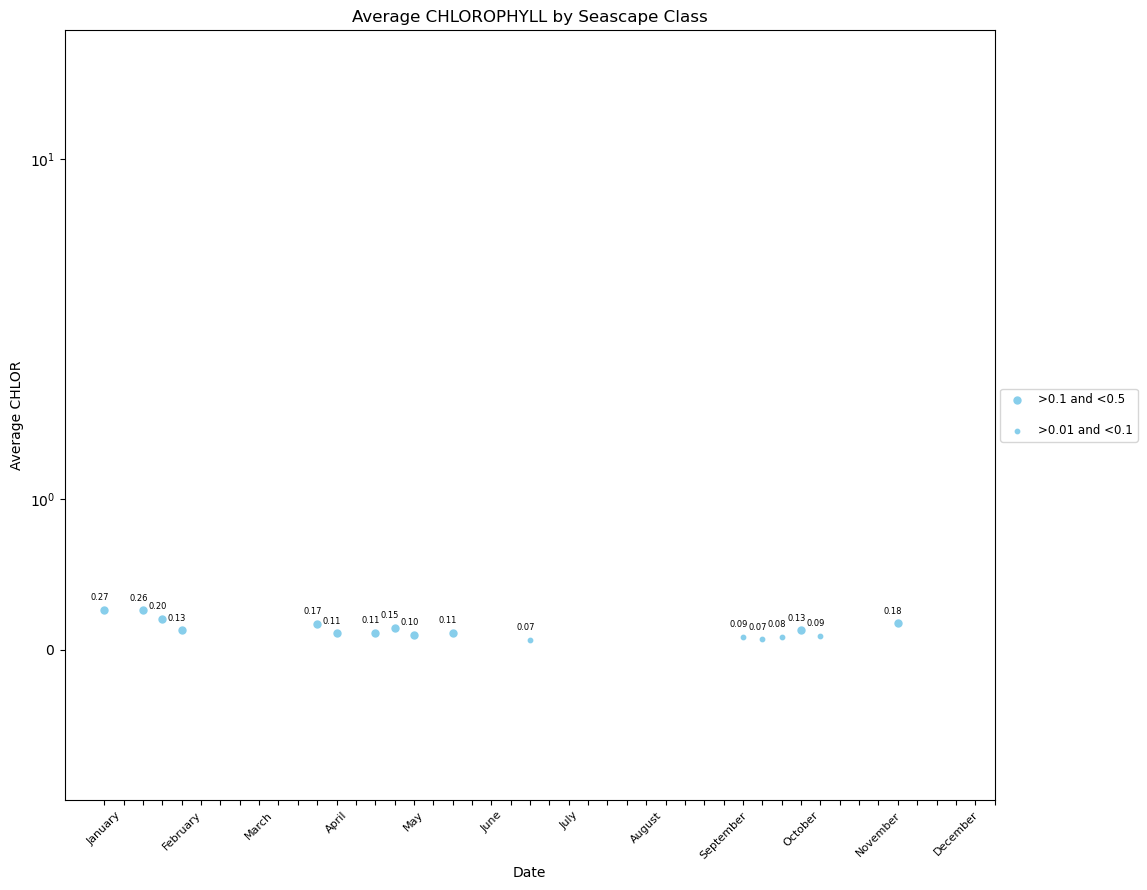

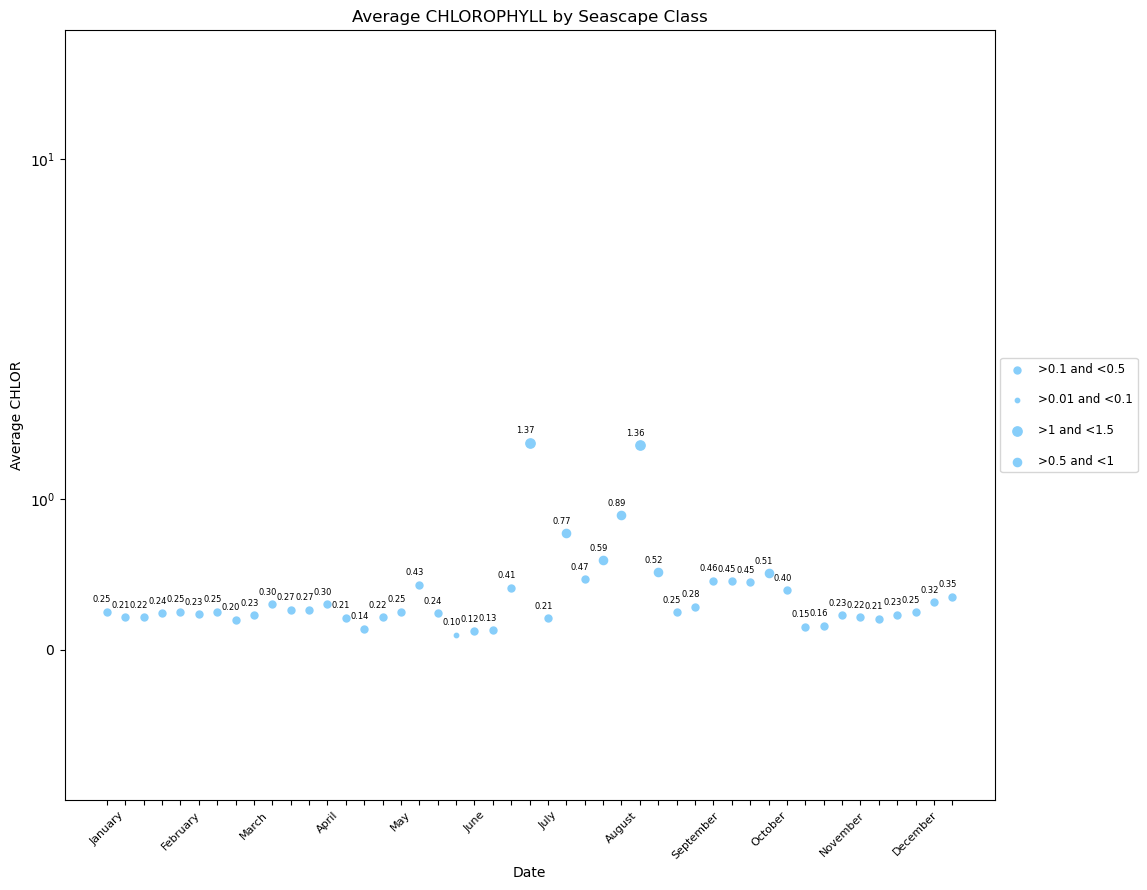

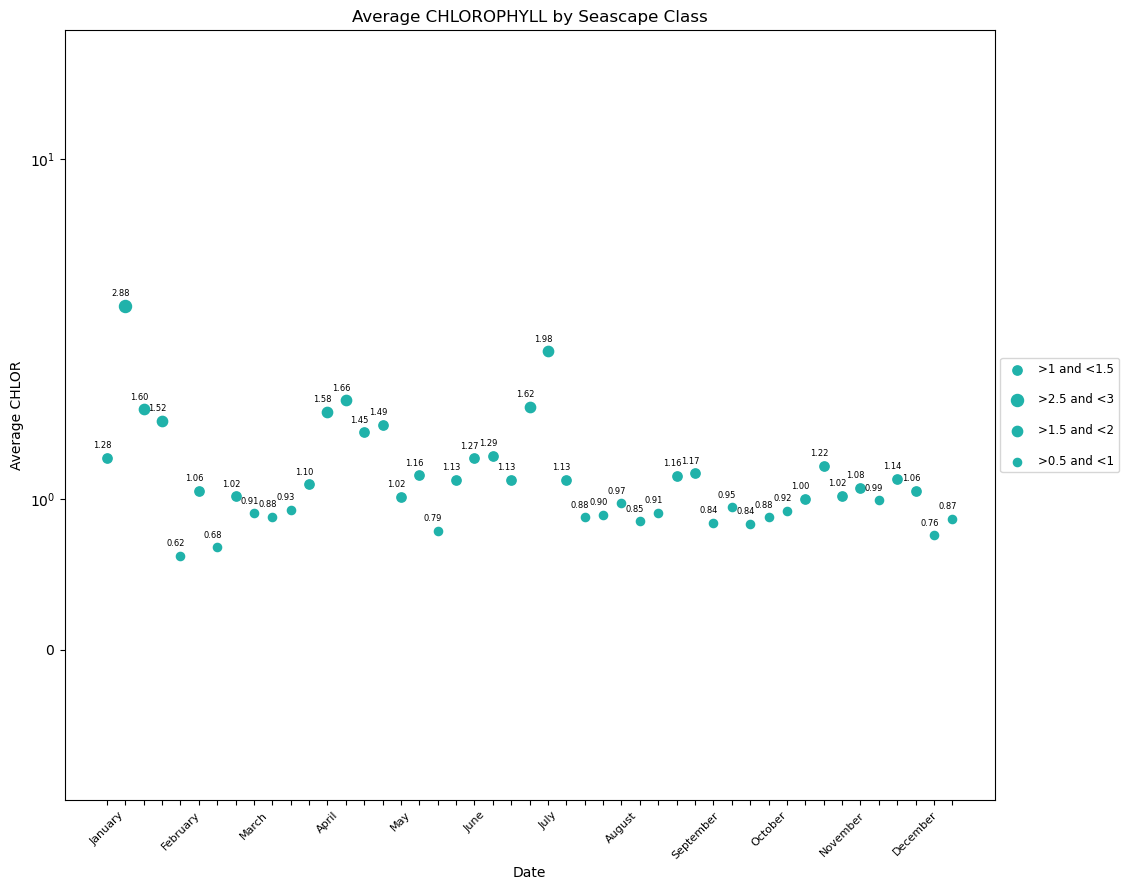

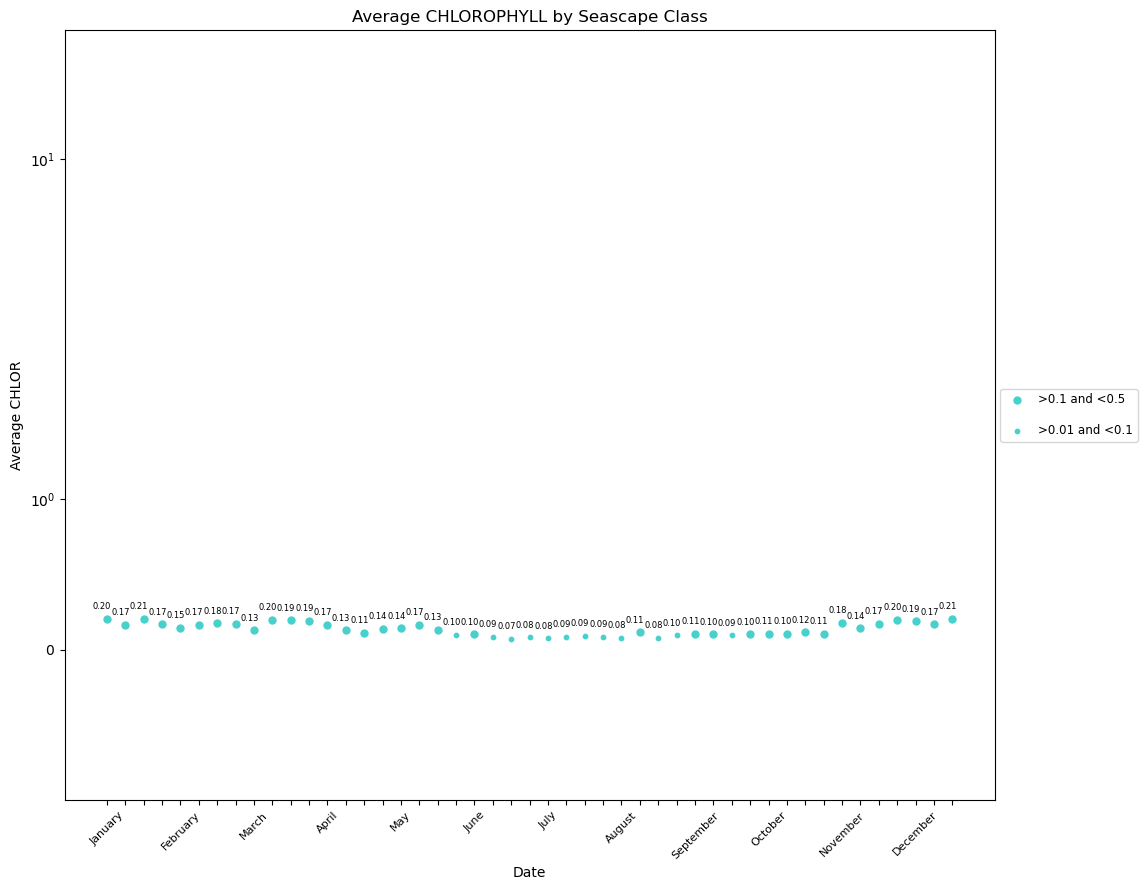

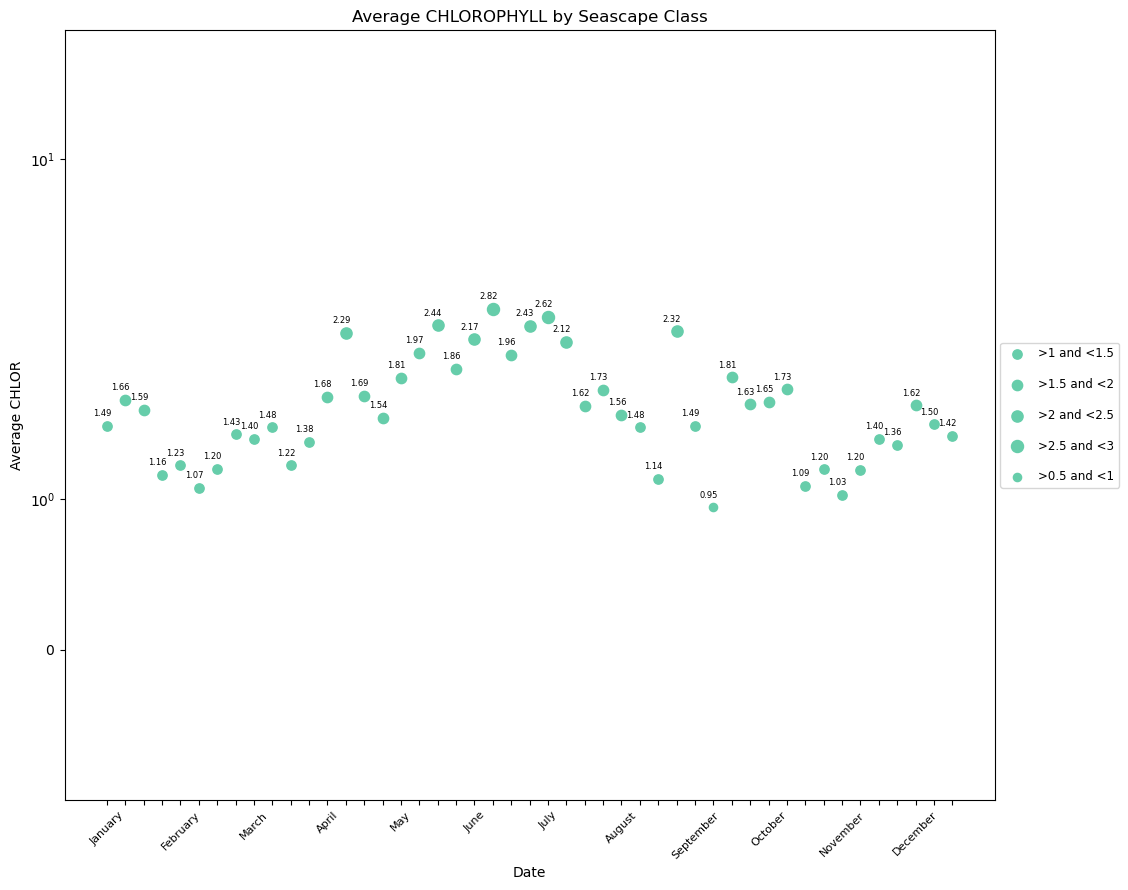

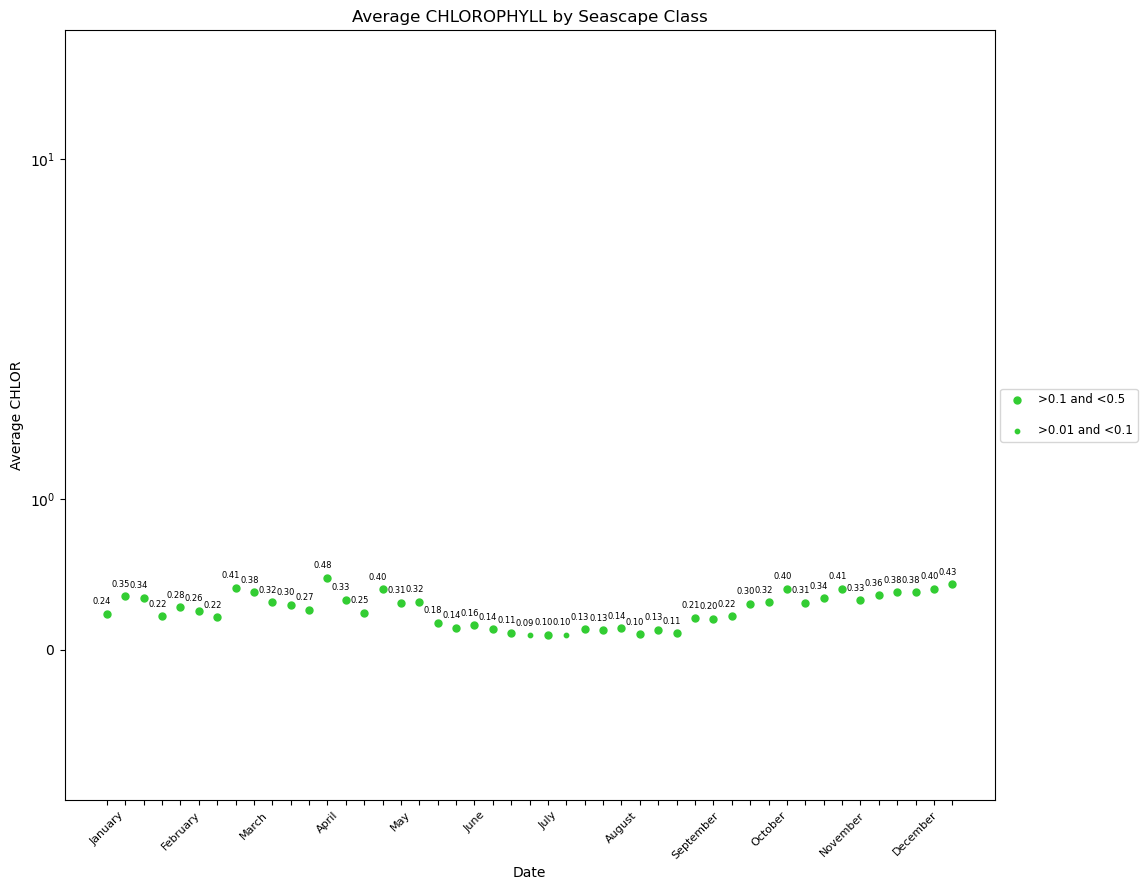

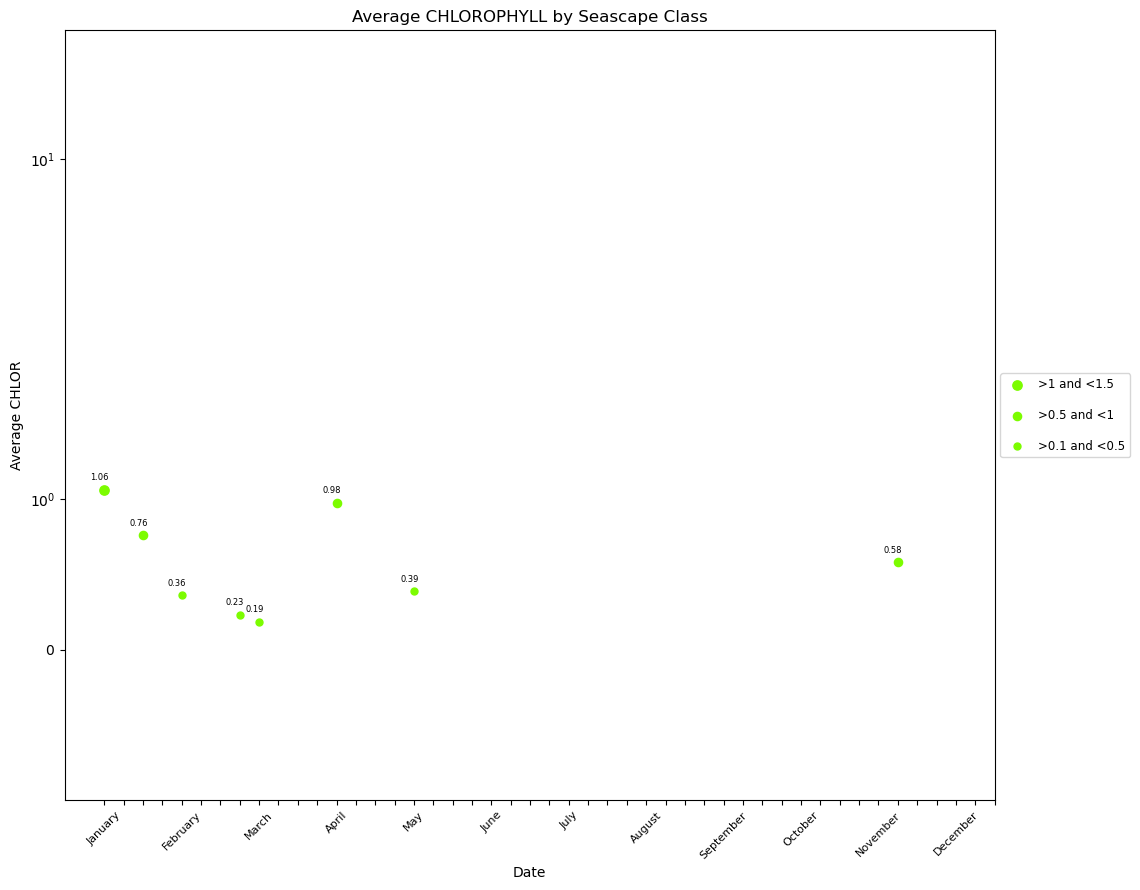

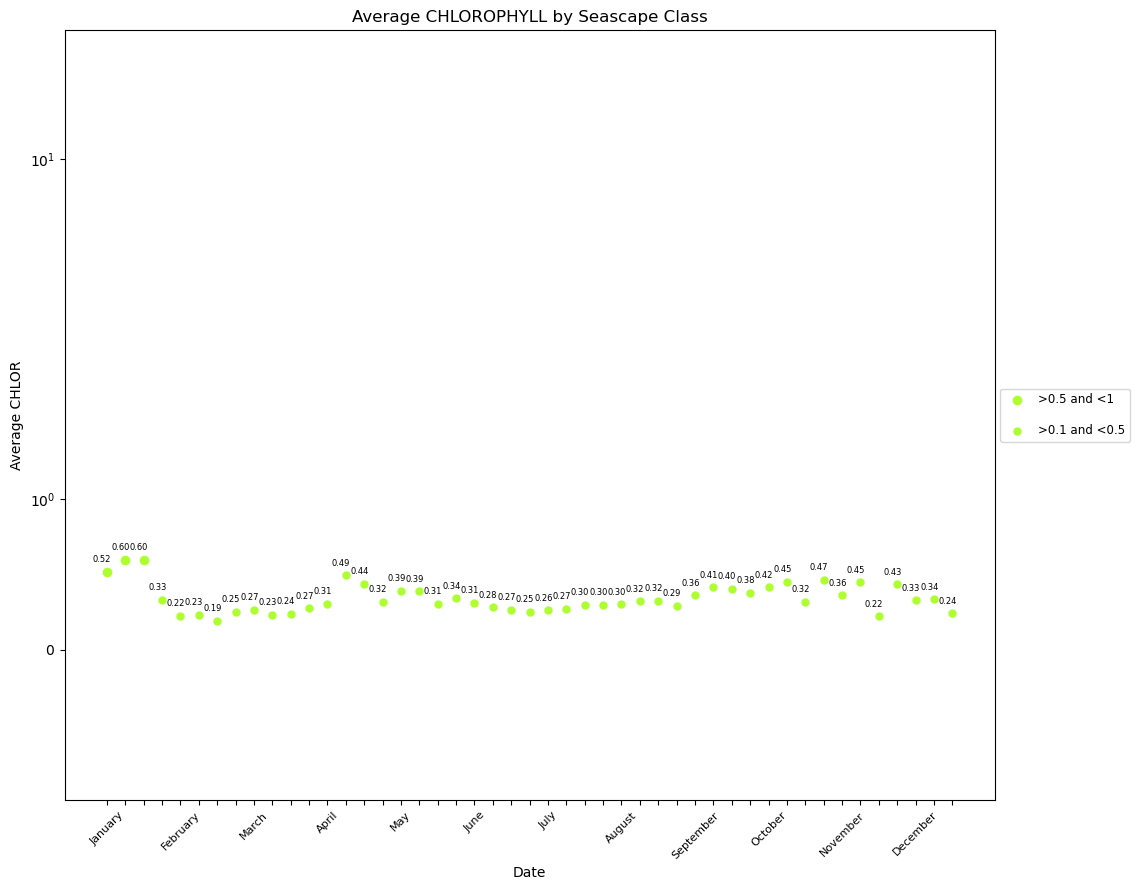

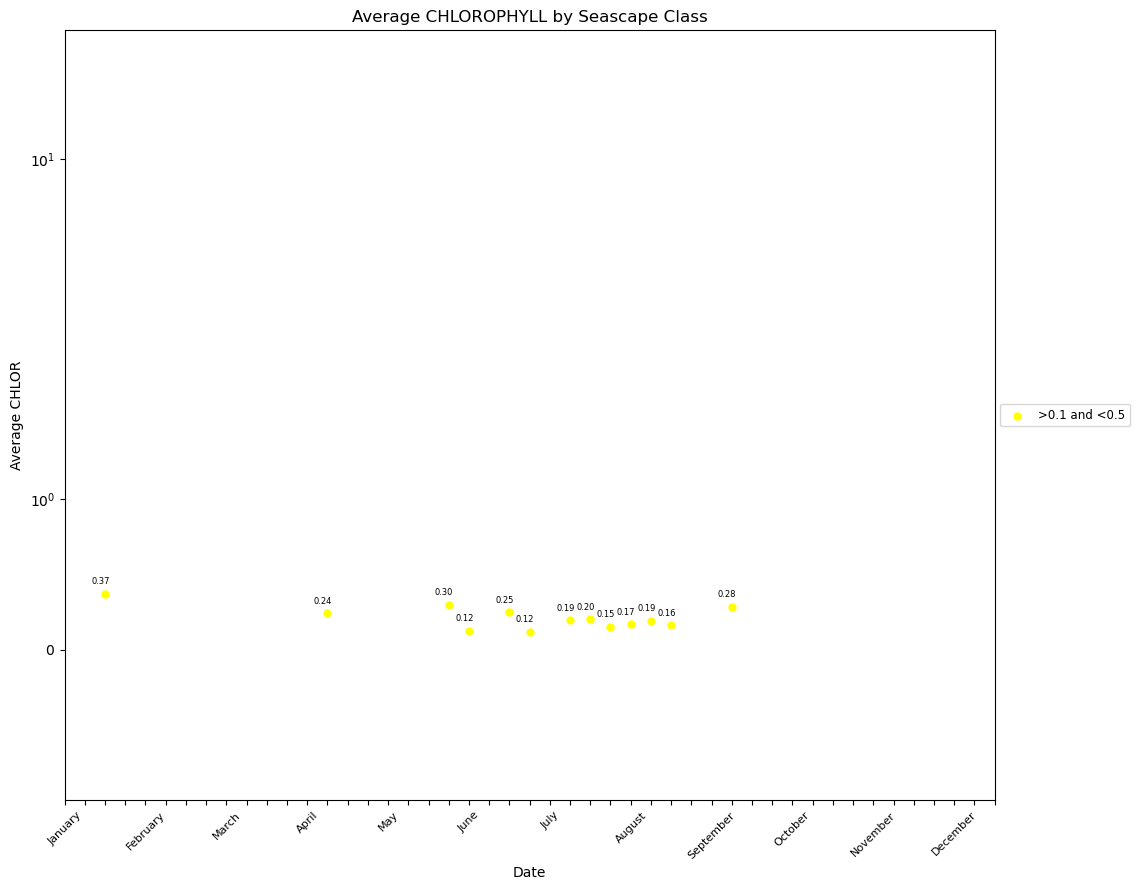

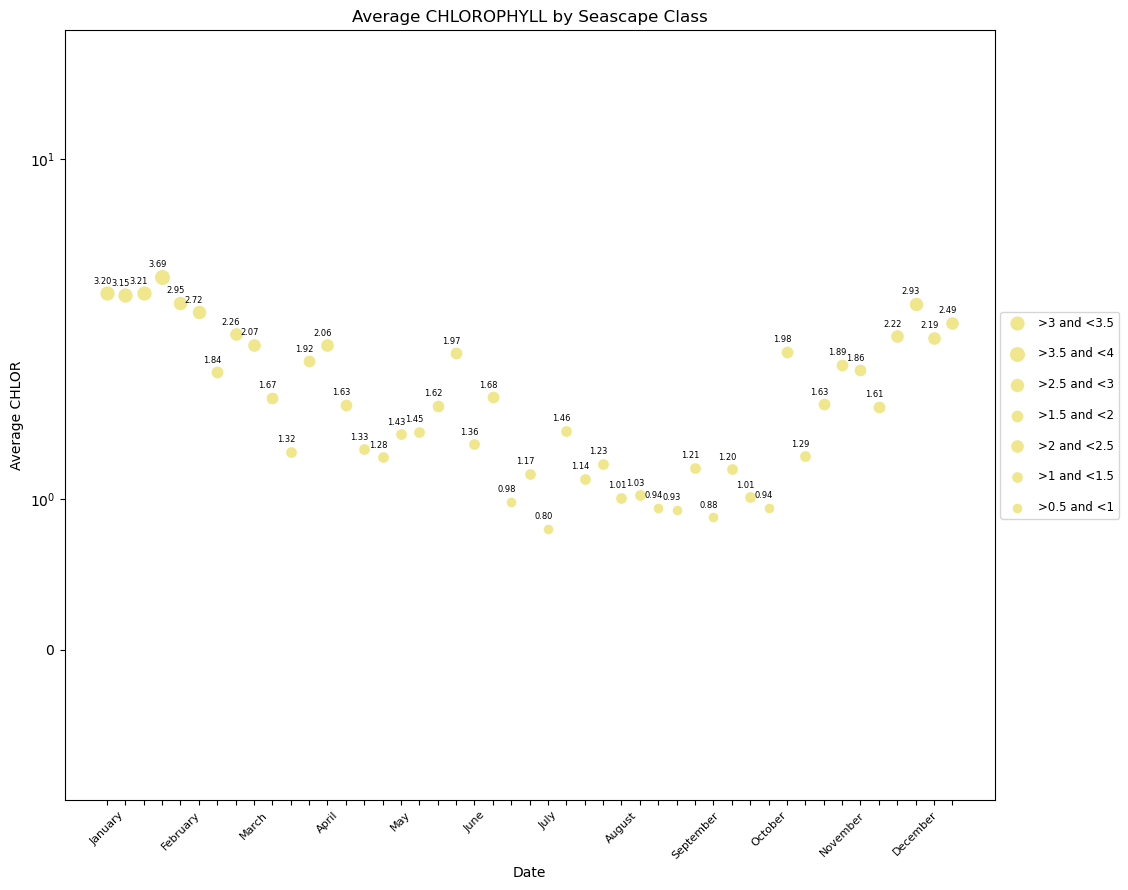

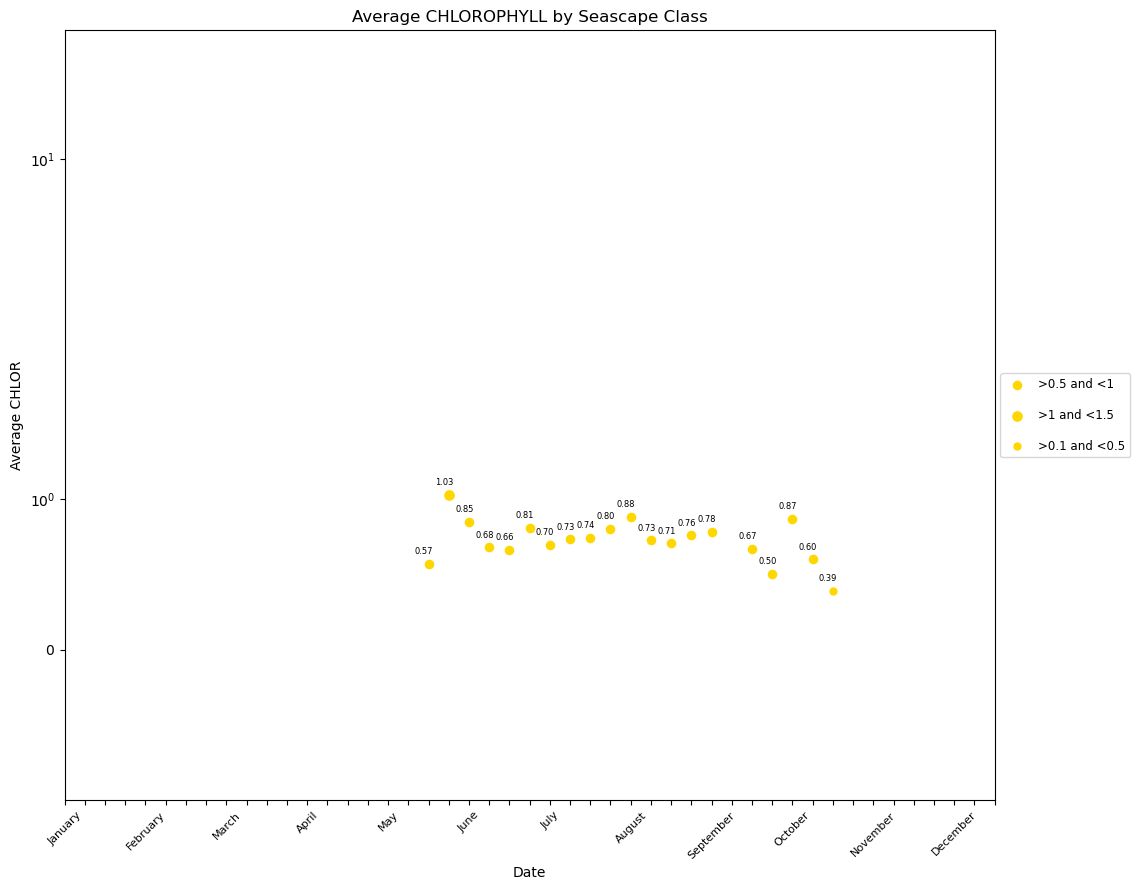

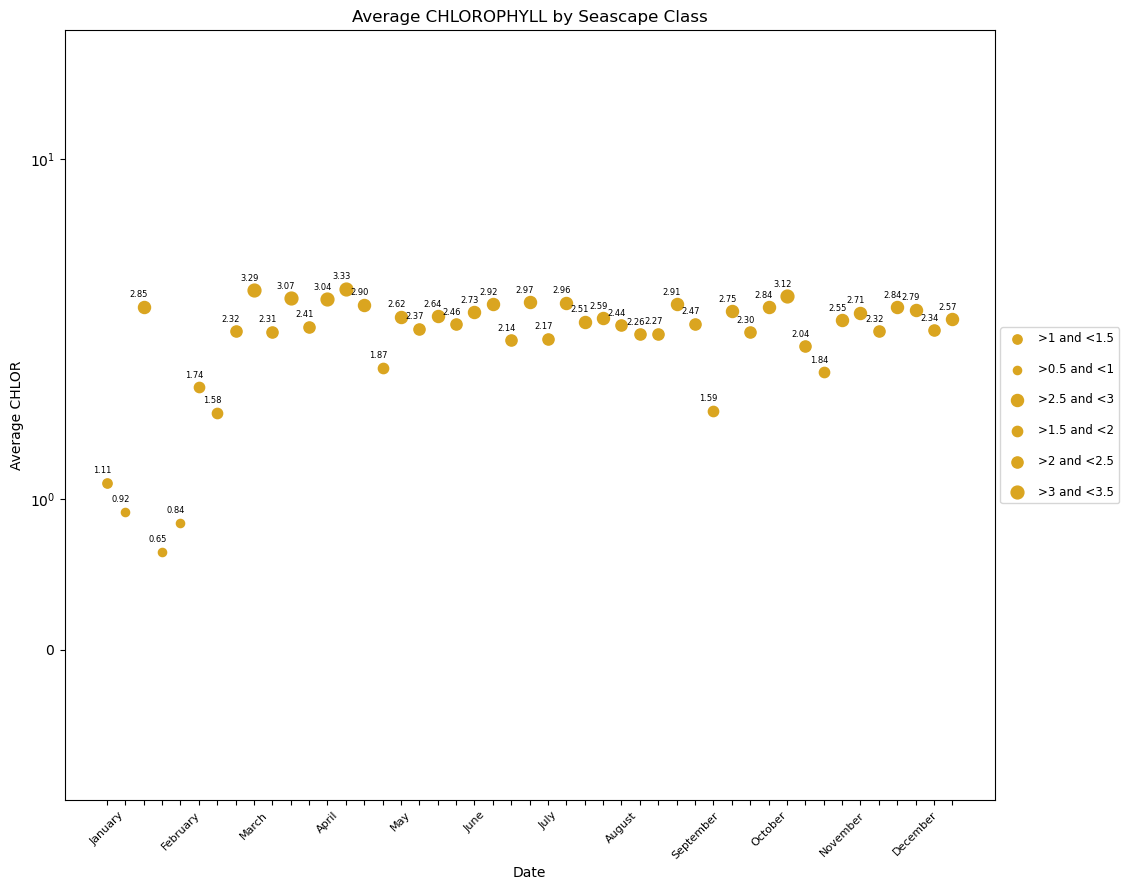

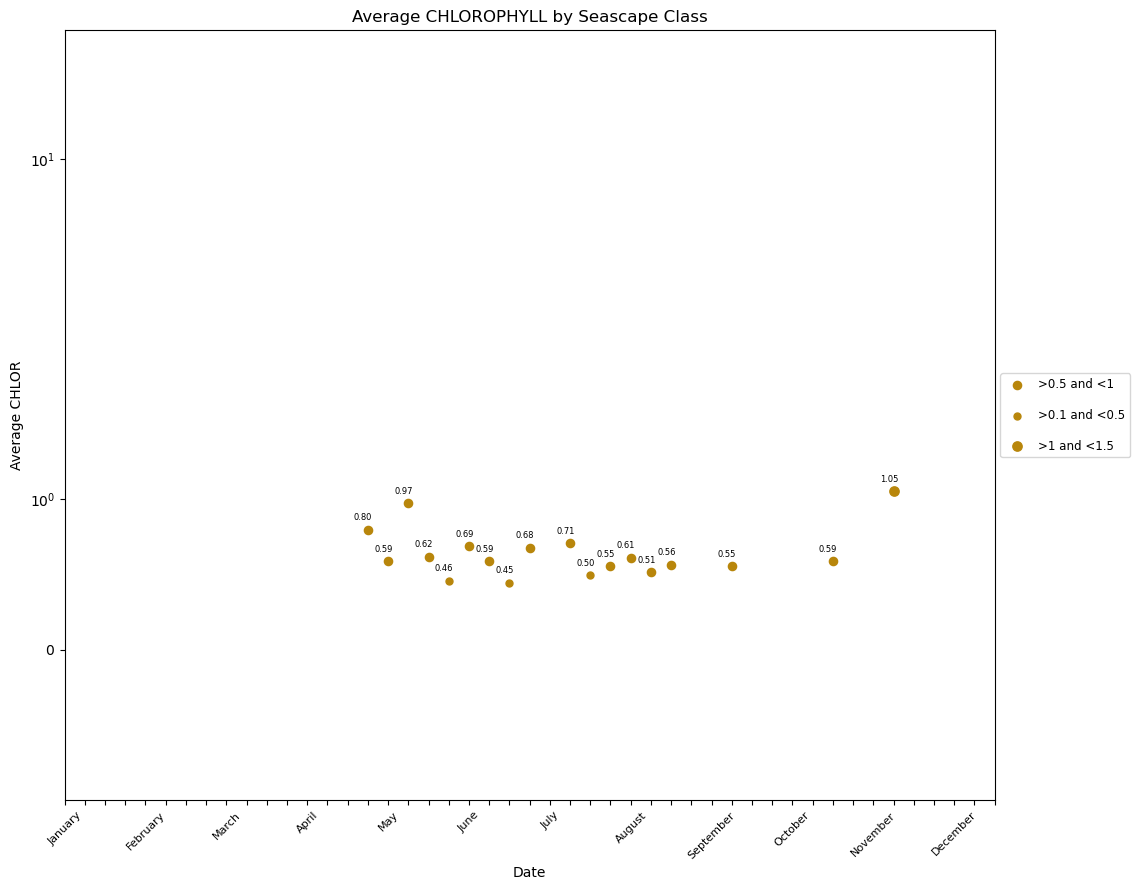

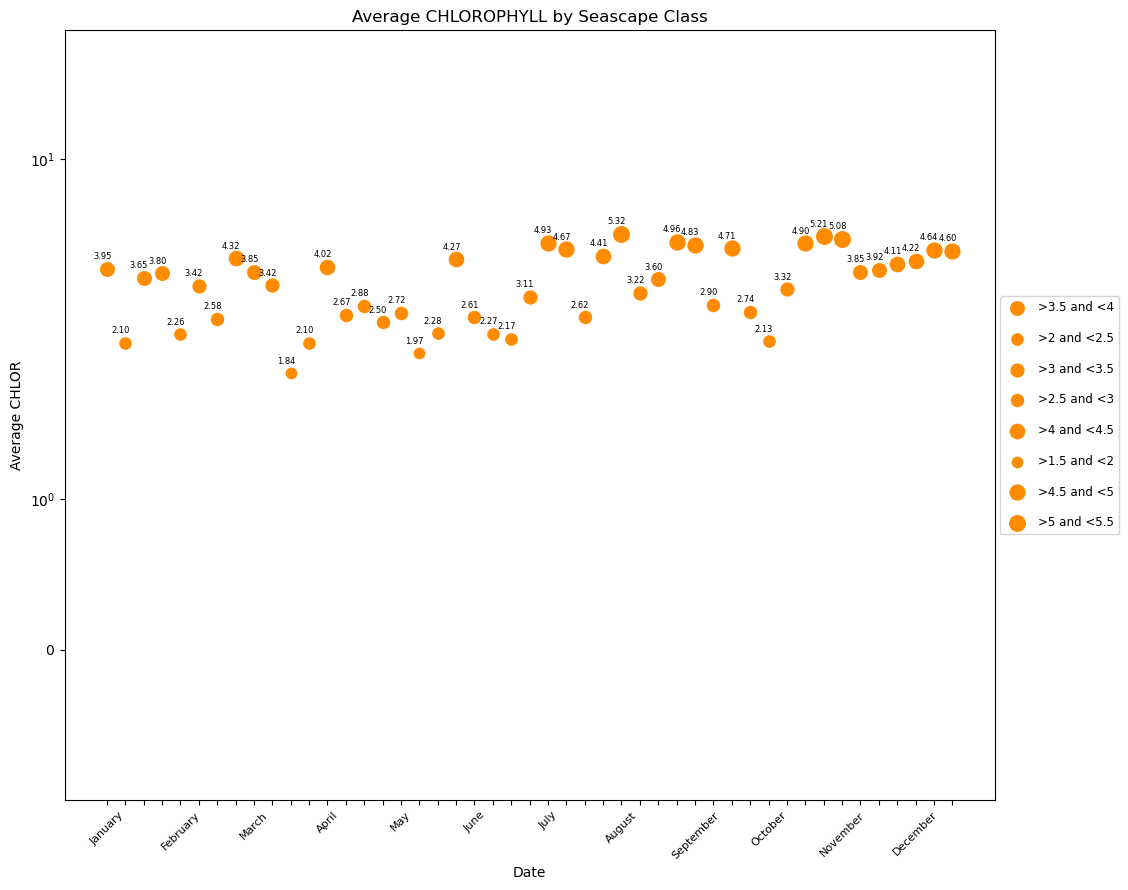

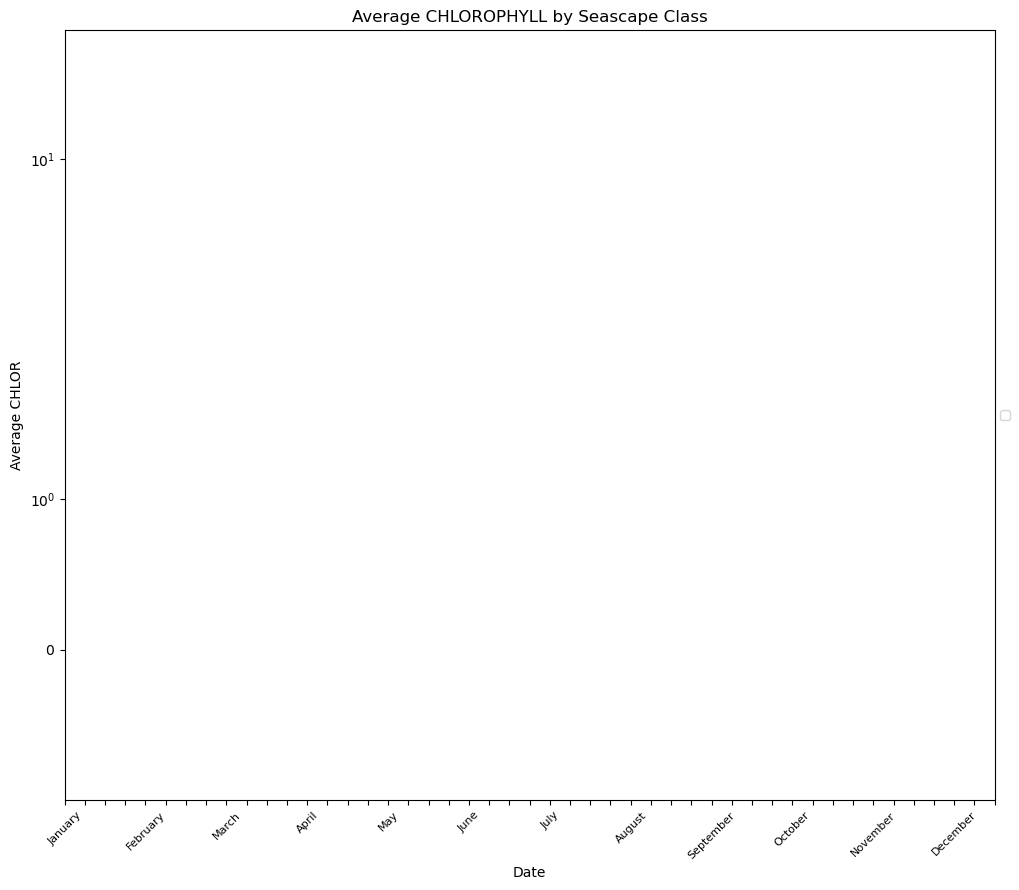

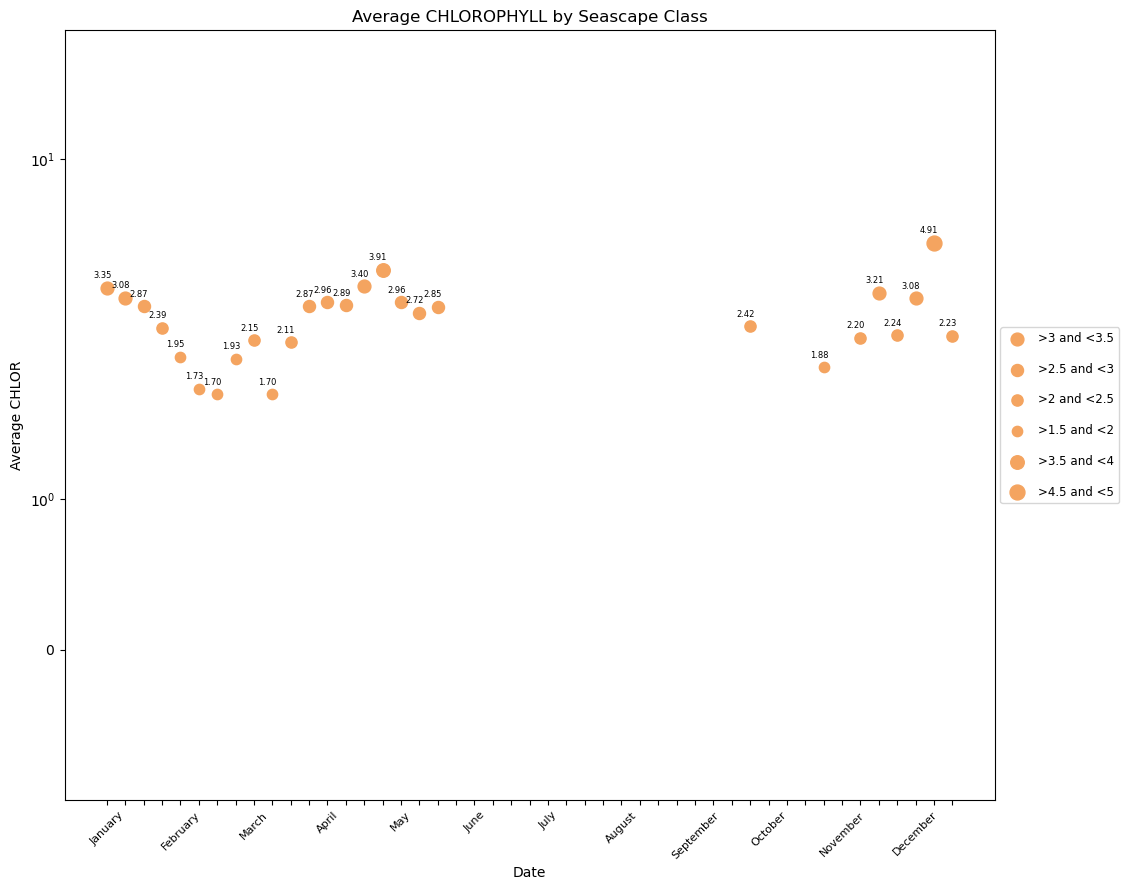

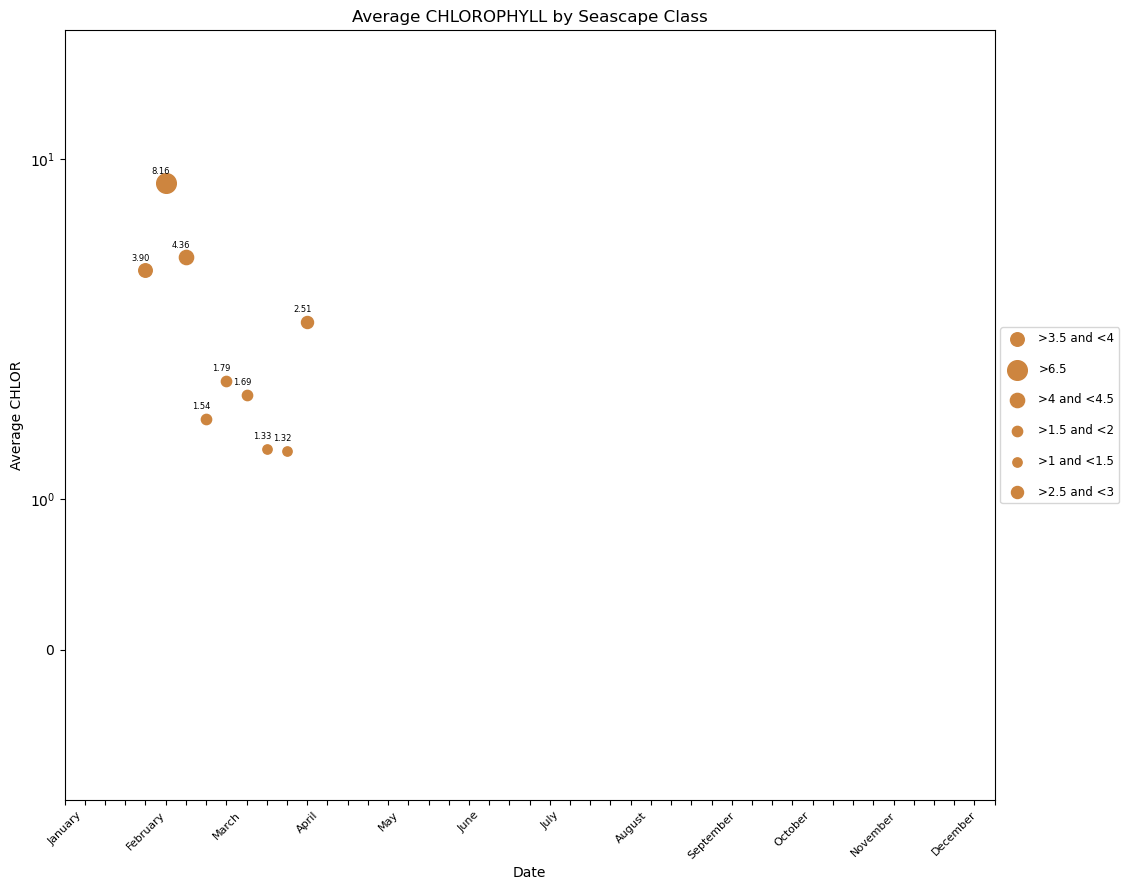

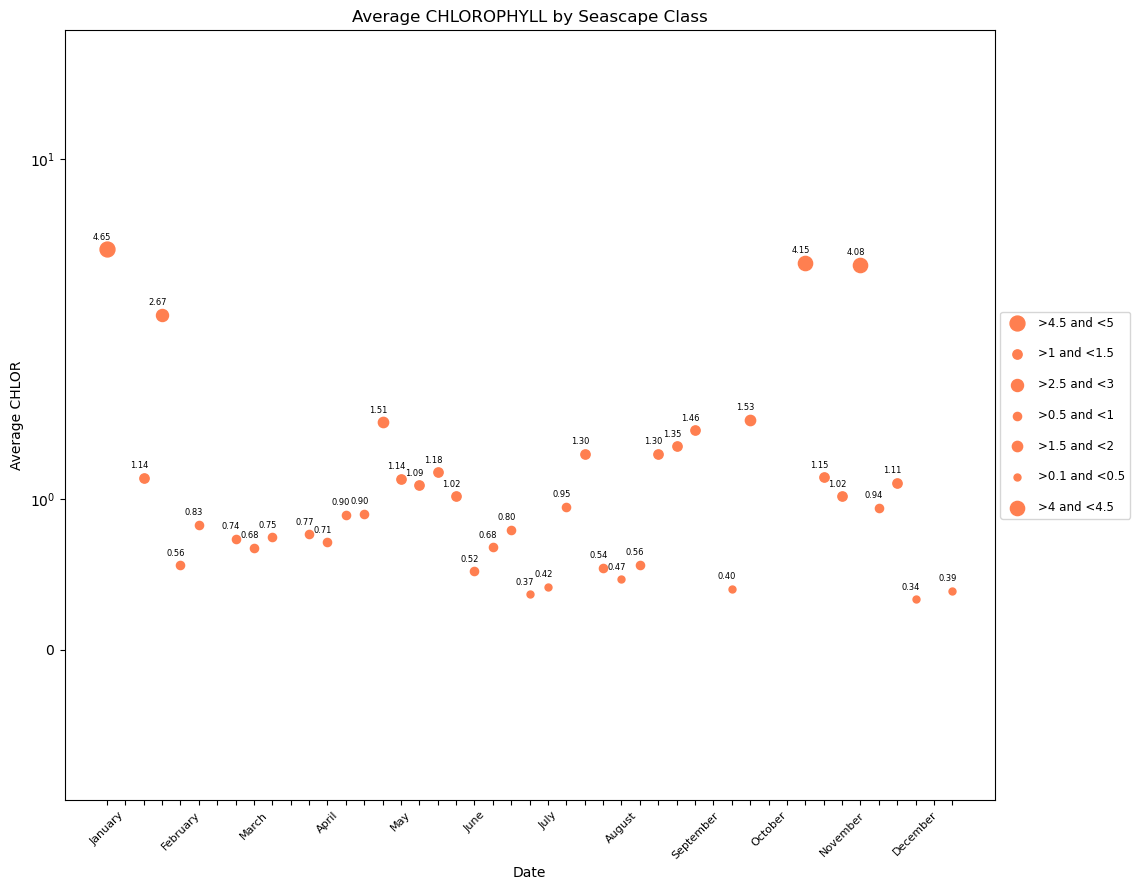

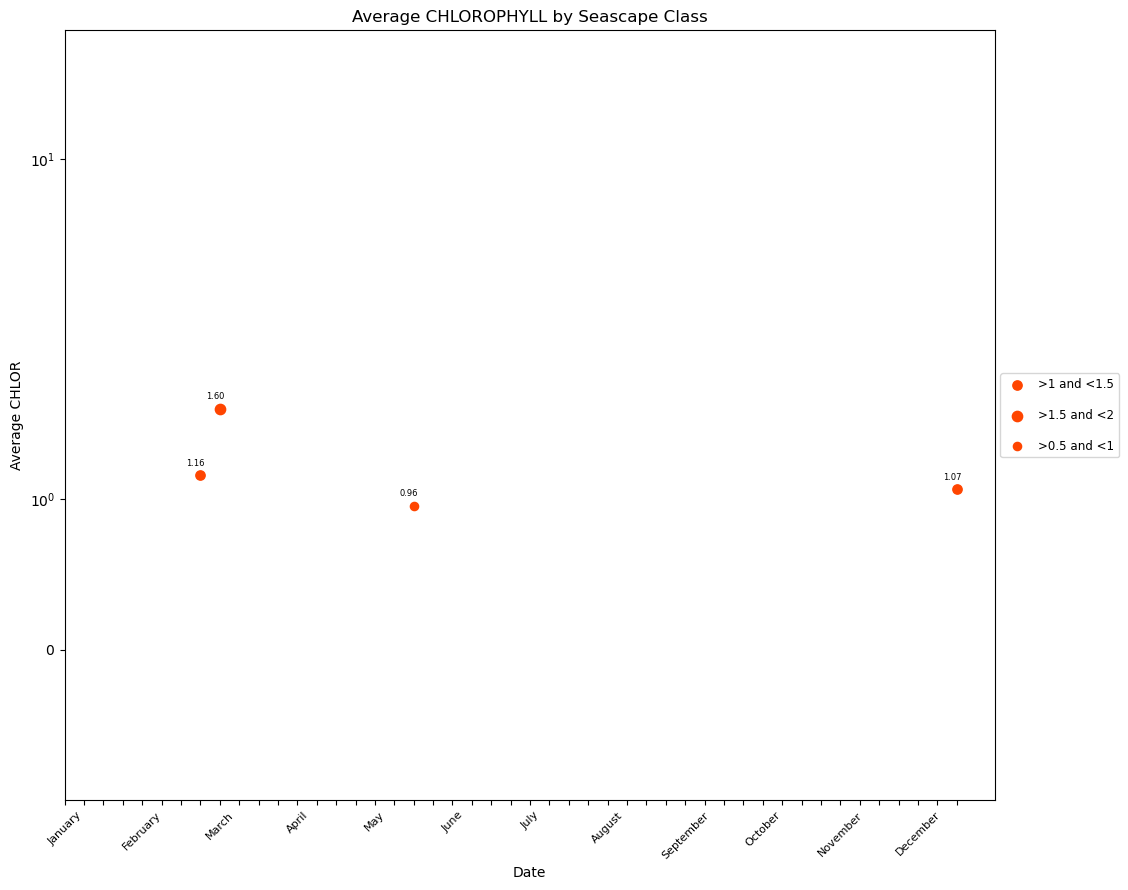

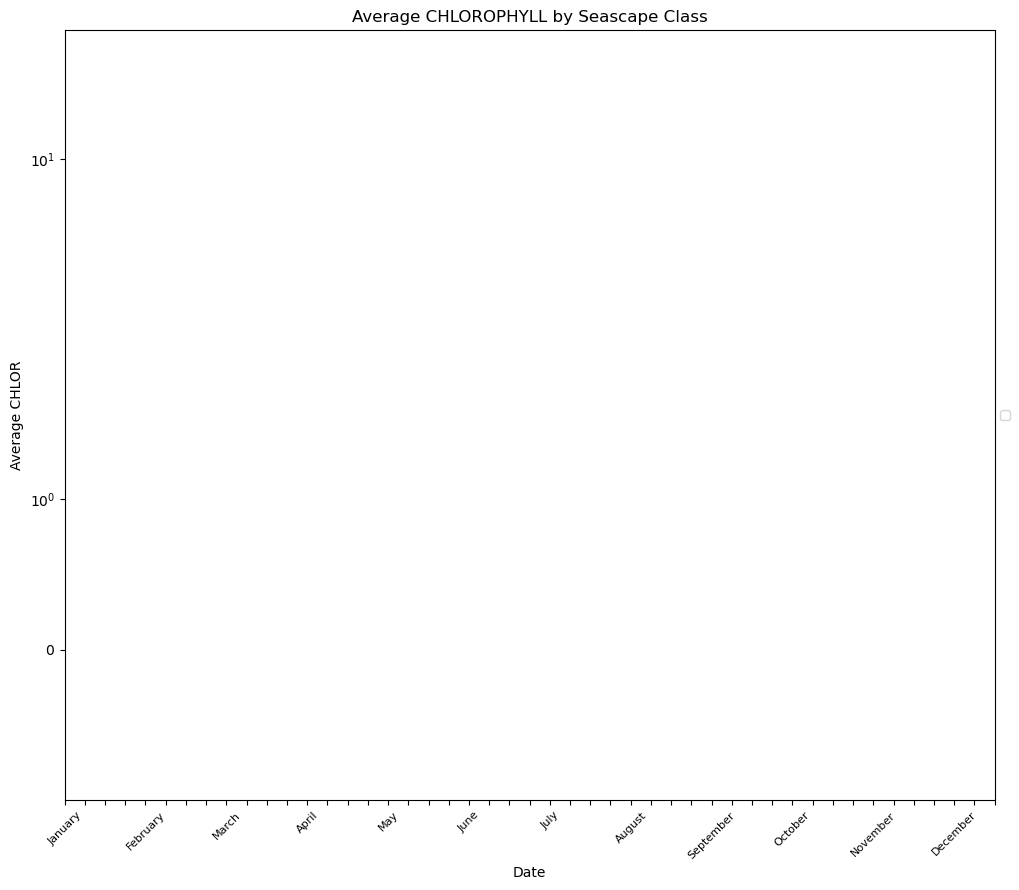

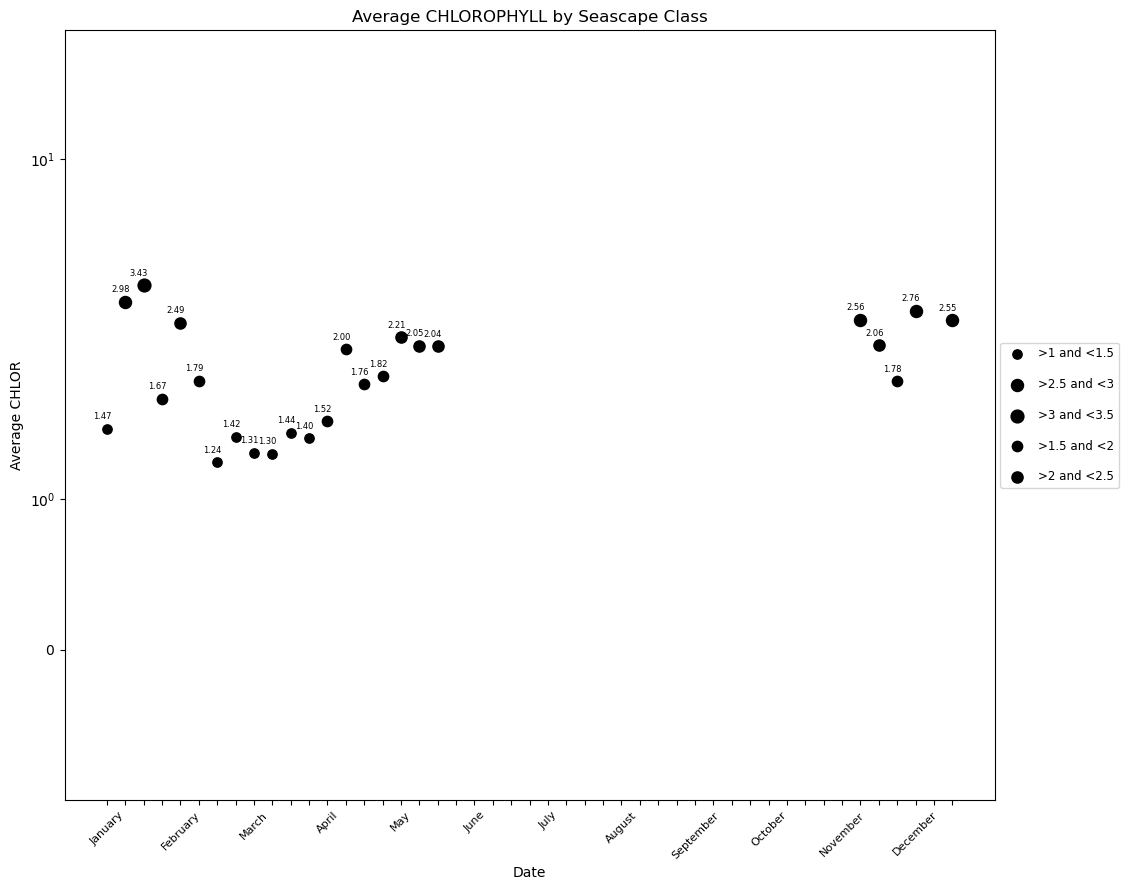

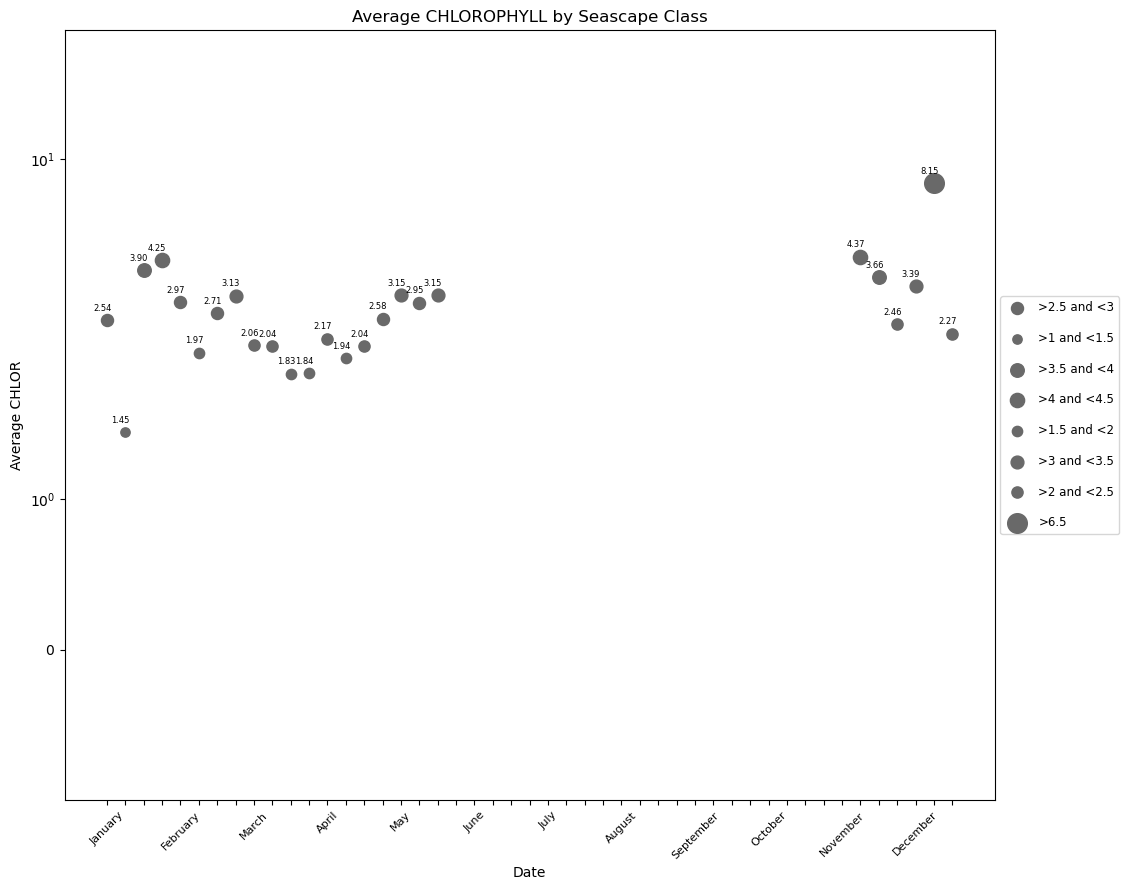

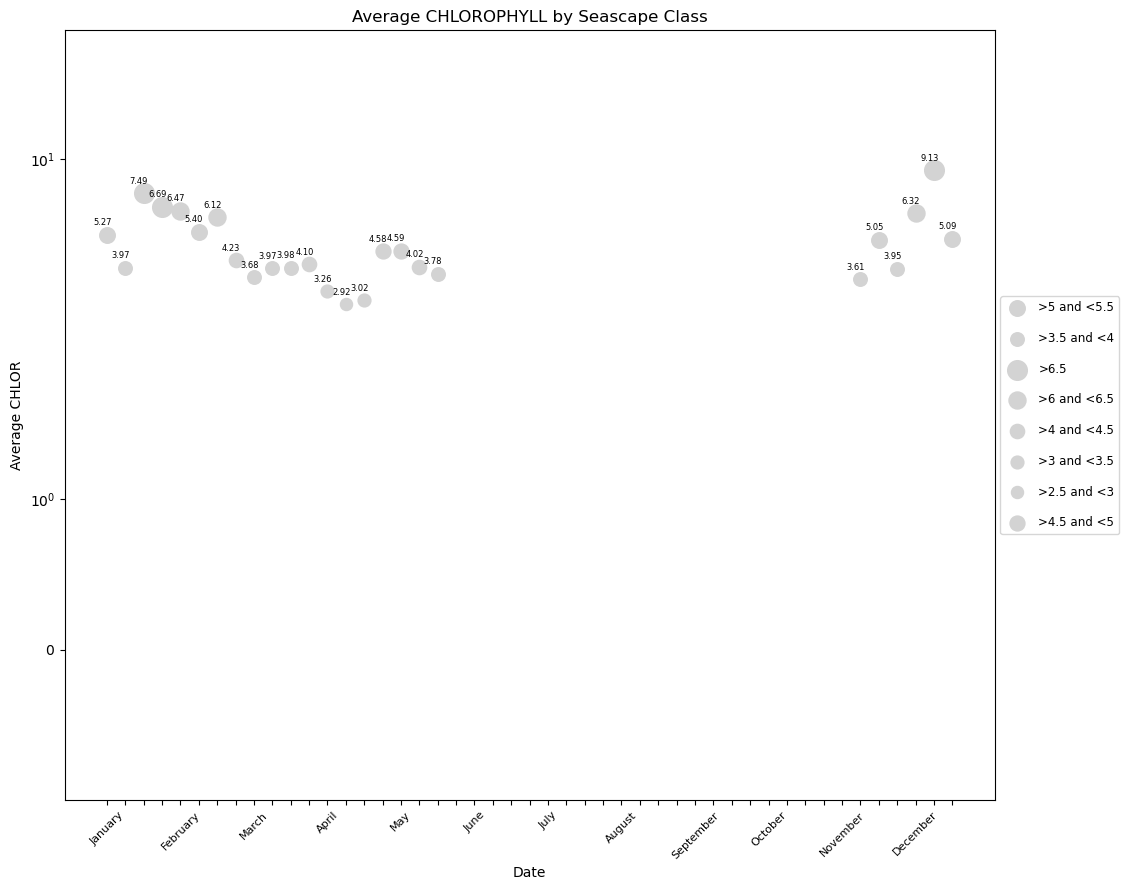

IndexError: list index out of range

<Figure size 1200x1000 with 0 Axes>

In [12]:
colors = ["midnightblue","navy","darkblue","mediumblue", "blue", "royalblue", 'cornflowerblue','steelblue','dodgerblue','deepskyblue','skyblue','lightskyblue','lightseagreen','mediumturquoise','mediumaquamarine','limegreen','lawngreen','greenyellow','yellow',
         'khaki','gold','goldenrod','darkgoldenrod','darkorange', 'chocolate','sandybrown','peru','coral','orangered','red','black','dimgrey', 'lightgray']


for x in range(1,34):
    fig = plt.figure(figsize=(12, 10)) #set figure size
    for i in range(len(averages[x])):
        if averages[x][i]<0.01:
            a= plt.scatter(xi[i], averages[x][i], s= 5, label= "<0.01", color = colors[x])
        elif averages[x][i]>0.01 and averages[x][i]<0.1:
            b=plt.scatter(xi[i], averages[x][i], s= 10, label= ">0.01 and <0.1", color = colors[x])
        elif averages[x][i]>0.1 and averages[x][i]<0.5:
            c=plt.scatter(xi[i], averages[x][i], s= 25, label= ">0.1 and <0.5", color = colors[x])    
        elif averages[x][i]>0.5 and averages[x][i]<1:
            d=plt.scatter(xi[i], averages[x][i], s= 35, label= ">0.5 and <1", color = colors[x])  
        elif averages[x][i]>1 and averages[x][i]<1.5:
            e=plt.scatter(xi[i], averages[x][i], s= 45, label= ">1 and <1.5", color = colors[x]) 
        elif averages[x][i]>1.5 and averages[x][i]<2:
            f=plt.scatter(xi[i], averages[x][i], s= 55, label= ">1.5 and <2", color = colors[x])    
        elif averages[x][i]>2 and averages[x][i]<2.5:
            g=plt.scatter(xi[i], averages[x][i], s= 65, label= ">2 and <2.5", color = colors[x])
        elif averages[x][i]>2.5 and averages[x][i]<3:
            h=plt.scatter(xi[i], averages[x][i], s= 75, label= ">2.5 and <3", color = colors[x])   
        elif averages[x][i]>3 and averages[x][i]<3.5:
            i=plt.scatter(xi[i], averages[x][i], s= 85, label= ">3 and <3.5", color = colors[x])  
        elif averages[x][i]>3.5 and averages[x][i]<4:
            j=plt.scatter(xi[i], averages[x][i], s= 95, label= ">3.5 and <4", color = colors[x]) 
        elif averages[x][i]>4 and averages[x][i]<4.5:
            k=plt.scatter(xi[i], averages[x][i], s= 105, label= ">4 and <4.5", color = colors[x])
        elif averages[x][i]>4.5 and averages[x][i]<5:
            l=plt.scatter(xi[i], averages[x][i], s= 115, label= ">4.5 and <5", color = colors[x])
        elif averages[x][i]>5 and averages[x][i]<5.5:
            m=plt.scatter(xi[i], averages[x][i], s= 125, label= ">5 and <5.5", color = colors[x])
        elif averages[x][i]>5.5 and averages[x][i]<6:
            n=plt.scatter(xi[i], averages[x][i], s= 135, label= ">5.5 and <6", color = colors[x])
        elif averages[x][i]>6 and averages[x][i]<6.5:
            o=plt.scatter(xi[i], averages[x][i], s= 150, label= ">6 and <6.5", color = colors[x])
        elif averages[x][i]>6.5:
            p=plt.scatter(xi[i], averages[x][i], s= 200, label= ">6.5", color = colors[x])
    plt.title('Average CHLOROPHYLL by Seascape Class')
    plt.ylabel('Average CHLOR')
    plt.xlabel('Date')
    plt.tick_params(axis='x', labelsize=10) #change date tick label size
    plt.xticks(xi, month, rotation=45, fontsize=8) #add correct labels
    plt.ylim(-1, 30)
    plt.yscale('symlog')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize= '8.5', labelspacing = 1.5)
    labels = []
    for i in range(len(xi)): 
        if i % 4 == 0: 
            labels.append(month[i])
        else: 
            labels.append("")

    plt.xticks(ticks=xi,labels=labels)

    for i in range(len(xi)):
        plt.annotate(f'{averages[x][i]:.2f}', (xi[i],averages[x][i]), fontsize=6, xycoords='data',
                xytext=(-10, 7), textcoords='offset points')
        
    plt.show()

Text(0.5, 1.0, 'Average Chlorophyll by Seascapes Classes 2023-09-22')

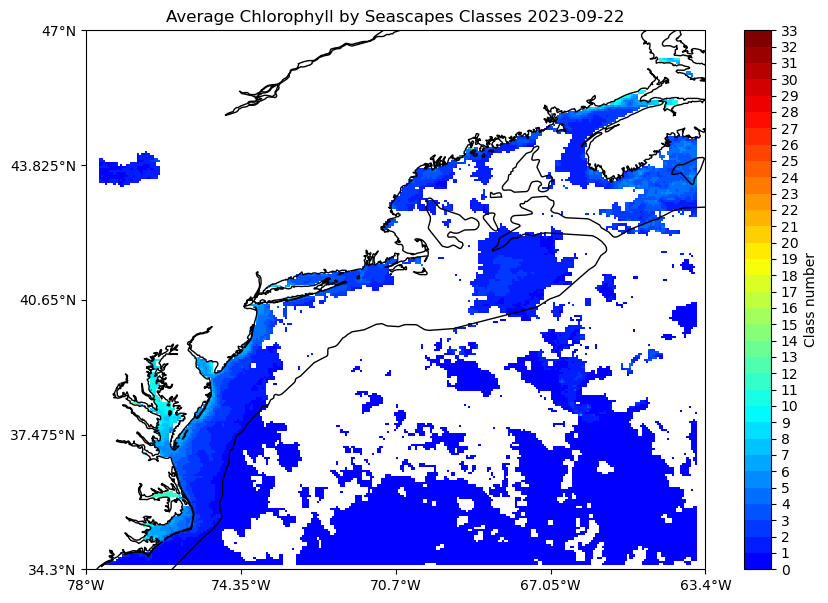

In [14]:
jet = ["blue", "#007FFF", "cyan", "#7FFF7F",
       "yellow", "#FF7F00", "red", "#7F0000"]

fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 

cm = LinearSegmentedColormap.from_list('my_jet', jet, N=33) #call colormap
im = ax.pcolormesh(seascapes.longitude, seascapes.latitude,dc_source.chlor_a[1], cmap = cm, vmin=0, vmax=33) #set variables to plot
ax.coastlines()
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.ops import cascaded_union
bathym = cfeature.NaturalEarthFeature(name='bathymetry_K_200', scale='10m', category='physical')
bathym = cascaded_union(list(bathym.geometries()))
ax.add_geometries(bathym, facecolor='none', edgecolor='black', crs=ccrs.PlateCarree())

ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection) #set latitude bounds 
ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection) #set longitude bounds
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = plt.colorbar(im, label='Class number',) #colorbar title 
tick_locator = ticker.MaxNLocator(nbins=33) #set 33 ticks to colorbar (one for each seascape class) 
cb.locator = tick_locator
cb.update_ticks()
plt.title('Average Chlorophyll by Seascapes Classes ' +str(seascapes.time[x].dt.strftime('%Y-%m-%d').item()))